In [104]:
import pandas as pd

In [105]:
import os
import pandas as pd

# Print the current working directory
print("Current Directory:", os.getcwd())

# Check if the file exists in the directory
file_path = "uber_data_NS - uber_data_NS.csv"
print("File read successfully!")  # Ensure the string is enclosed in quotes


Current Directory: C:\Users\ayush
File read successfully!


In [106]:
import os
import pandas as pd

# Check current directory
print("Current Directory:", os.getcwd())

# File path
file_path = "uber_data_NS - uber_data_NS.csv"

# Check if file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File read successfully!")
    print("DataFrame shape:", df.shape)  # This should now work!
else:
    print("Error: File not found! Check the filename and location.")


Current Directory: C:\Users\ayush
File read successfully!
DataFrame shape: (1106, 8)


In [107]:
df.head()

,trip_id,trip_time,timeframe,Unnamed: 3,origin,destination,payment_method,payment_amount
0,1,00:40,0-1,0-1,Kolhapur,Amravati,UPI,571
1,2,00:36,0-1,0-1,Nagpur,Aurangabad,UPI,434
2,3,00:19,0-1,0-1,Aurangabad,Amravati,Credit Card,298
3,4,00:04,0-1,0-1,Navi Mumbai,Amravati,Cash,1731
4,5,00:13,0-1,0-1,Mumbai,Nagpur,UPI,613


In [108]:
print(df.shape)

(1106, 8)


In [109]:
print(df.isnull().sum())

trip_id             0
trip_time           0
timeframe           0
Unnamed: 3        517
origin              0
destination         0
payment_method      0
payment_amount      0
dtype: int64


In [110]:
upi_payments = df[df['payment_method'].str.lower() == 'upi']  # Ensure case insensitivity
print(upi_payments)


      trip_id trip_time timeframe Unnamed: 3      origin destination  \
0           1     00:40       0-1        0-1    Kolhapur    Amravati   
1           2     00:36       0-1        0-1      Nagpur  Aurangabad   
4           5     00:13       0-1        0-1      Mumbai      Nagpur   
7           8     00:26       0-1        0-1  Aurangabad    Kolhapur   
10         11     00:42       0-1        0-1    Amravati     Solapur   
...       ...       ...       ...        ...         ...         ...   
1085     1086     23:57     23-24      23-24      Nagpur      Nashik   
1086     1087     23:08     23-24      23-24        Pune    Kolhapur   
1091     1092     23:59     23-24      23-24     Solapur        Pune   
1097     1098     23:47     23-24      23-24      Nashik     Solapur   
1102     1103     23:44     23-24      23-24       Thane    Amravati   

     payment_method  payment_amount  
0               UPI             571  
1               UPI             434  
4               UPI  

In [111]:
print(df['payment_method'].unique())  # List all payment modes


['UPI' 'Credit Card' 'Cash' 'Google Pay']


In [112]:
upi_above_800 = df[(df['payment_method'].str.lower() == 'upi') & (df['payment_amount'] > 800)]
print(upi_above_800)


      trip_id trip_time timeframe Unnamed: 3      origin  destination  \
7           8     00:26       0-1        0-1  Aurangabad     Kolhapur   
10         11     00:42       0-1        0-1    Amravati      Solapur   
13         14     00:01       0-1        0-1        Pune  Navi Mumbai   
14         15     00:44       0-1        0-1    Amravati      Solapur   
17         18     00:34       0-1        0-1     Solapur       Mumbai   
...       ...       ...       ...        ...         ...          ...   
1053     1054     22:31     22-23      22-23     Solapur       Mumbai   
1054     1055     22:19     22-23      22-23     Solapur   Aurangabad   
1077     1078     23:45     23-24      23-24      Nagpur     Amravati   
1082     1083     23:59     23-24      23-24        Pune   Aurangabad   
1097     1098     23:47     23-24      23-24      Nashik      Solapur   

     payment_method  payment_amount  
7               UPI             826  
10              UPI            1410  
13       

In [113]:
df.head()

,trip_id,trip_time,timeframe,Unnamed: 3,origin,destination,payment_method,payment_amount
0,1,00:40,0-1,0-1,Kolhapur,Amravati,UPI,571
1,2,00:36,0-1,0-1,Nagpur,Aurangabad,UPI,434
2,3,00:19,0-1,0-1,Aurangabad,Amravati,Credit Card,298
3,4,00:04,0-1,0-1,Navi Mumbai,Amravati,Cash,1731
4,5,00:13,0-1,0-1,Mumbai,Nagpur,UPI,613


In [114]:
print(df['trip_time'].head())  # Display first few values
print(df['trip_time'].dtype)   # Check data type


0    00:40
1    00:36
2    00:19
3    00:04
4    00:13
Name: trip_time, dtype: object
object


In [115]:
import re

def convert_to_minutes(duration):
    match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)m)?', str(duration))  # Handle NaN values safely
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return 0  # Default to 0 if no match

df['trip_time_min'] = df['trip_time'].apply(convert_to_minutes)


In [116]:
print(df['trip_time_min'].head())

0    0
1    0
2    0
3    0
4    0
Name: trip_time_min, dtype: int64


In [117]:
trips_above_1hr = df[df['trip_time_min'] > 60]
print(trips_above_1hr)


Empty DataFrame
Columns: [trip_id, trip_time, timeframe, Unnamed: 3, origin, destination, payment_method, payment_amount, trip_time_min]
Index: []


In [118]:
df.rename(columns={'origin_column': 'origin', 'destination_column': 'destination'}, inplace=True)


In [119]:
mumbai_to_thane = df[(df['origin'].str.lower() == 'mumbai') & (df['destination'].str.lower() == 'thane')]
print(mumbai_to_thane)


      trip_id trip_time timeframe Unnamed: 3  origin destination  \
100       101     02:41       2-3        NaN  Mumbai       Thane   
102       103     02:49       2-3        NaN  Mumbai       Thane   
137       138     03:49       3-4        NaN  Mumbai       Thane   
295       296     07:39       7-8        NaN  Mumbai       Thane   
410       411     09:06      9-10        NaN  Mumbai       Thane   
442       443     10:47     10-11        NaN  Mumbai       Thane   
771       772     17:30     17-18      17-18  Mumbai       Thane   
794       795     17:02     17-18      17-18  Mumbai       Thane   
856       857     18:00     18-19      18-19  Mumbai       Thane   
896       897     19:22     19-20      19-20  Mumbai       Thane   
917       918     19:27     19-20      19-20  Mumbai       Thane   
1016     1017     21:28     21-22      21-22  Mumbai       Thane   

     payment_method  payment_amount  trip_time_min  
100             UPI             634              0  
102      

In [120]:
trip_count1 = len(mumbai_to_thane)
print("Total travllers from Mumbai to Thane are:", trip_count1)

Total travllers from Mumbai to Thane are: 12


In [121]:
route_counts = df.groupby(['origin', 'destination']).size().reset_index(name='trip_count_highest')
      

In [122]:
most_traveled_route = route_counts.loc[route_counts['trip_count_highest'].idxmax()]
print("Most traveled route:\n", most_traveled_route)


Most traveled route:
 origin                 Thane
destination           Nashik
trip_count_highest        21
Name: 95, dtype: object


In [123]:
top_origins = df['origin'].value_counts().head(5)
print("Top 5 most common origin cities:\n", top_origins)


Top 5 most common origin cities:
 origin
Mumbai         128
Thane          128
Solapur        128
Navi Mumbai    114
Kolhapur       105
Name: count, dtype: int64


In [124]:
top_destinations = df['destination'].value_counts().head(5)
print("Top 5 most common origin cities:\n", top_destinations)


Top 5 most common origin cities:
 destination
Nashik      126
Nagpur      122
Amravati    117
Mumbai      115
Thane       111
Name: count, dtype: int64


In [125]:
upi_payments = df[df['payment_method'].str.lower() == 'upi']


In [126]:
upi_by_origin = upi_payments['origin'].value_counts()
most_upi_origin = upi_by_origin.idxmax()
upi_count = upi_by_origin.max()

print(f"City with highest UPI transactions: {most_upi_origin} ({upi_count} times)")


City with highest UPI transactions: Pune (28 times)


In [127]:
cash_payments = df[df['payment_method'].str.lower() == 'Cash']

In [128]:
#Total number of trips

In [129]:
total_trips = df.shape[0]
print("Total trips:", total_trips)


Total trips: 1106


In [130]:
longest_trip = df.loc[df['trip_time'].idxmax()]
print("Longest trip details:\n", longest_trip)


Longest trip details:
 trip_id                  1075
trip_time               23:59
timeframe               23-24
Unnamed: 3              23-24
origin                  Thane
destination       Navi Mumbai
payment_method            UPI
payment_amount            332
trip_time_min               0
Name: 1074, dtype: object


In [131]:
most_common_origin = df['origin'].value_counts().idxmax()
print("Most common origin city:", most_common_origin)


Most common origin city: Mumbai


In [132]:
most_common_destination = df['destination'].value_counts().idxmax()
print("Most common destination city:", most_common_destination)


Most common destination city: Nashik


In [169]:
most_traveled_route = df.groupby(['origin' , 'destination']).size().idxmax()
print("Most traveled route:", most_traveled_route)


Most traveled route: ('Thane', 'Nashik')


In [165]:
mumbai_to_thane = df[(df['origin'] == 'Mumbai') & (df['destination'] == 'Thane')].shape[0]
print("Trips from Mumbai to Thane:", mumbai_to_thane)


Trips from Mumbai to Thane: 12


In [171]:
least_traveled_route = df.groupby(['origin', 'destination']).size().idxmin()
print("Least traveled route:", least_traveled_route)


Least traveled route: ('Amravati', 'Mumbai')


In [173]:
most_common_payment = df['payment_method'].value_counts().idxmax()
print("Most common payment method:", most_common_payment)



Most common payment method: Cash


In [177]:
upi_count = df[df['payment_method'] == 'UPI'].shape[0]
print("Number of UPI payments:", upi_count)


Number of UPI payments: 219


In [179]:
upi_by_origin = df[df['payment_method'] == 'UPI']['origin'].value_counts().idxmax()
print("City with highest UPI transactions:", upi_by_origin)


City with highest UPI transactions: Pune


In [189]:
avg_fare_upi = df[df['payment_method'] == 'UPI']['payment_amount'].mean()
avg_fare_cash = df[df['payment_method'] == 'Cash']['payment_amount'].mean()
print("Avg UPI Fare:", avg_fare_upi, "| Avg Cash Fare:", avg_fare_cash)


Avg UPI Fare: 1046.8219178082193 | Avg Cash Fare: 1050.4490238611713


In [193]:
total_revenue = df['payment_amount'].sum()
print("Total revenue:", total_revenue)


Total revenue: 1138189


In [197]:
highest_revenue_city = df.groupby('origin')['payment_amount'].sum().idxmax()
print("City with highest revenue:", highest_revenue_city)


City with highest revenue: Thane


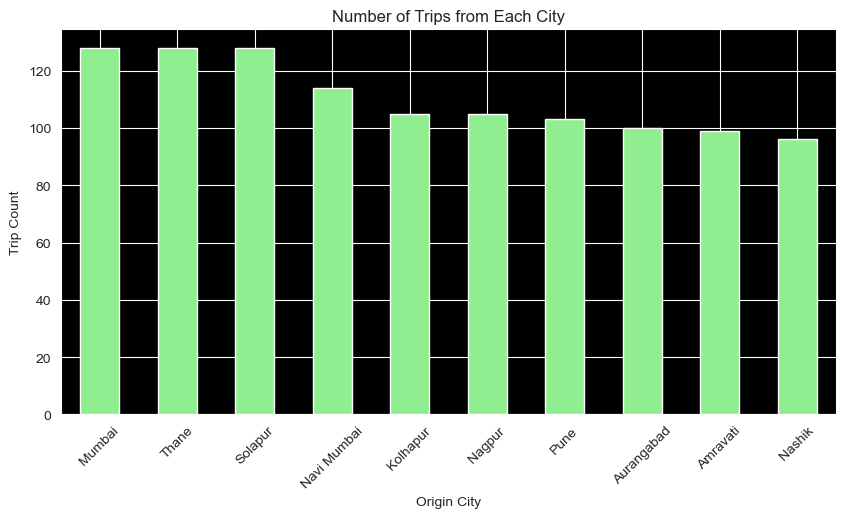

In [233]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5))
ax.set_facecolor('black')
df['origin'].value_counts().plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title("Number of Trips from Each City")
plt.xlabel("Origin City")
plt.ylabel("Trip Count")
plt.xticks(rotation=45)
plt.show()


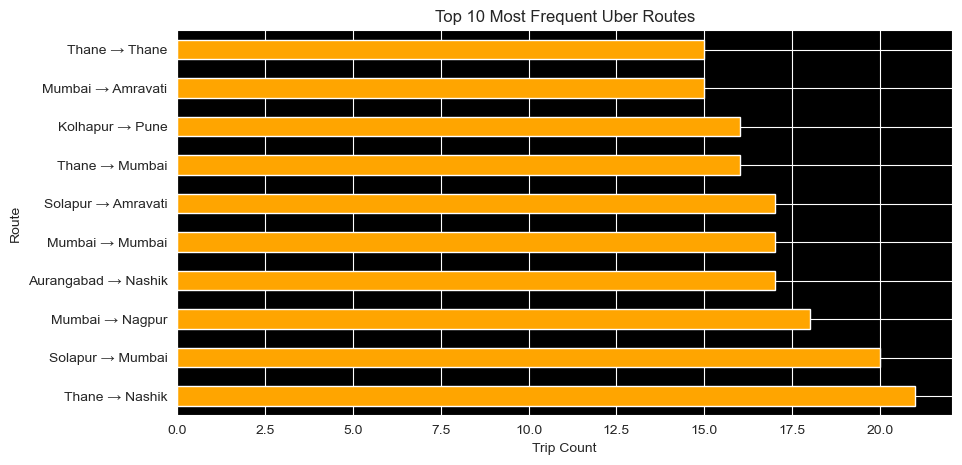

In [237]:
df['route'] = df['origin'] + " → " + df['destination']

fig, ax = plt.subplots(figsize=(8,5))
ax.set_facecolor('black')
df['route'].value_counts().nlargest(10).plot(kind='barh', figsize=(10,5), color='orange')
plt.title("Top 10 Most Frequent Uber Routes")
plt.xlabel("Trip Count")
plt.ylabel("Route")
plt.show()


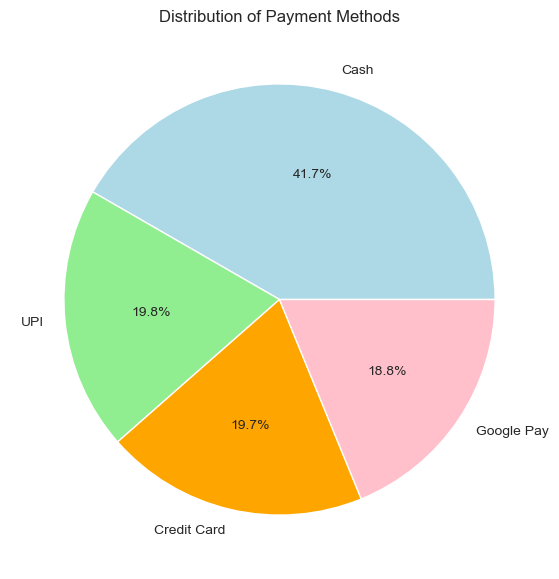

In [254]:

df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['lightblue', 'lightgreen', 'orange','pink'])
plt.title("Distribution of Payment Methods")
plt.ylabel("")  # Hide y-axis label
plt.show()


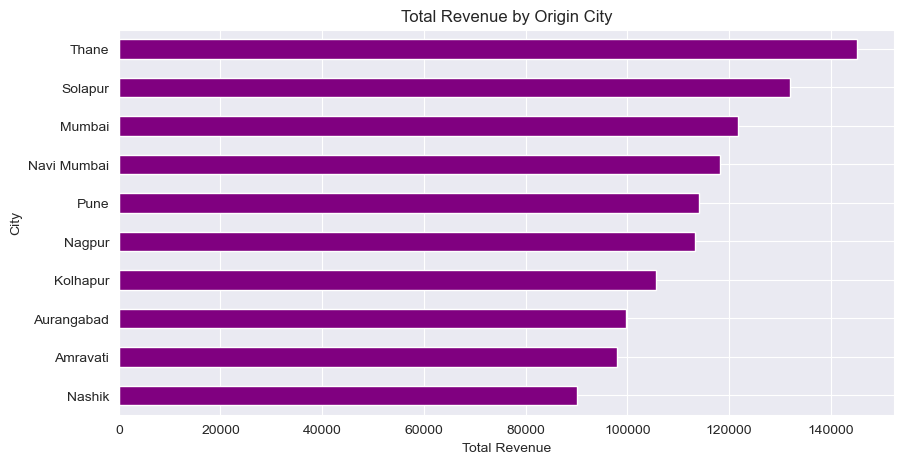

In [258]:
df.groupby('origin')['payment_amount'].sum().sort_values().plot(kind='barh', figsize=(10,5), color='purple')
plt.title("Total Revenue by Origin City")
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.show()


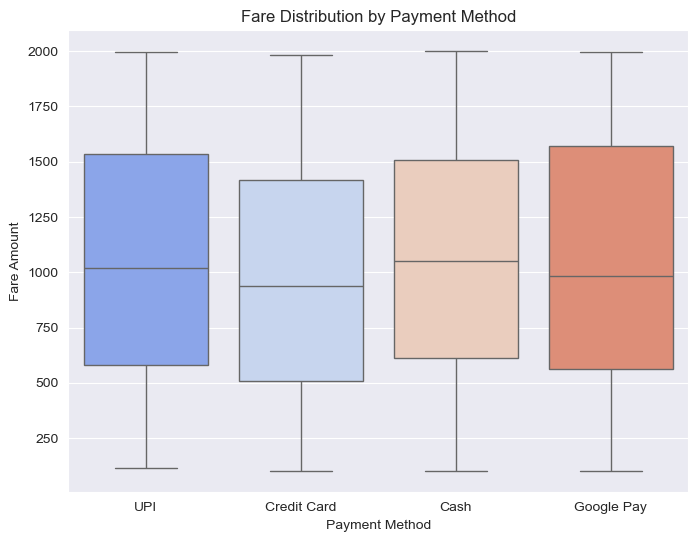

In [268]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='payment_method', y='payment_amount', data=df,hue='payment_method', palette="coolwarm", legend=False)
plt.title("Fare Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Fare Amount")
plt.show()
